 # Sentiment Analyse + Deep Learn - Amazon App 

This is my very first NLP and Deep Learn project and I really wanna know what you guys think about that. I'm open to all improvements, rewording or criticism. Please don't hesitate to leave me a comment or upvote. 
I will appreciate it.

# Table of Contents <a name="top"></a>

* [1 - Introduction](#introduction)
* [2 - Data](#data)
* [3 - Methodology](#methodology)
* [4 - Data Extraction](#DE)
    * [4.1 - Web Scraping](#WS)
    * [4.2 - Data Check](#Dc)
    * [4.3 - Score to Sentiment](#SS)
* [5 - Text Preprocessing](#TP)
    * [5.1 - Removing HTML](#RHTML)
    * [5.2 - Removing Accented Characters](#RAC)
    * [5.3 - Extended Contractions](#EC)
    * [5.4 - Removing Special Characters](#RSC)
    * [5.5 - Lemmatization](#L)
    * [5.6 - Removing Stop Words](#RSW)
    * [5.7 - Checking If Is An English Word](#CEW)
    * [5.8 - Removing Digits and Duplicate White Spaces](#RDDWS)
* [6 - Pipeline](#Pipeline)
* [7 - Plot](#Plot)
    * [7.1 - Sentiment Distribution](#SD)
    * [7.2 - Words Cloud](#WC)
    * [7.3 - N_Gram Plot](#NGP)
* [8 - Modeling](#Modeling)
    * [8.1 - Train Test Split](#TTS)
    * [8.2 - Embedding](#E)
    * [8.3 - Balancing](#B)
    * [8.4 - Feature Selection](#FS)
    * [8.5 - Evaluation Metrics](#EM)
    * [8.6 - Neural Network](#NN)
* [9 - Results](#Results)
    * [9.1 - Plotting History](#PH)
    * [ 9.2 - Test Evaluate](#TE)
    * [9.3 - Test Function](#TF)
* [10 - Conclusion](#CON)


# Special Thanks

Before starting, I would like to thank two project writers that were fundamental to this project to be accomplished.
[Usman Malik](https://twitter.com/usman_malikk), the writer of [Python for NLP: Multi-label Text Classification with Keras](https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/) and also [Thiago Panini](https://www.linkedin.com/in/thiago-panini/) that wrote this amazing golden 
medal notebook [E-Commerce Sentiment Analysis: EDA + Viz + NLP](https://www.kaggle.com/thiagopanini/e-commerce-sentiment-analysis-eda-viz-nlp) here on Kaggle.

For sure you guys are not helping just myself! Thank you for sharing! 🙏🏻

<a id="introduction"></a>
# 1 - Introduction

There is a lot of information available in the text format on the web. Reading that we can understand the sentiment about websites/products/brands in public tweets or in a review publicaed.

However if you have the mission of getting and evaluating the users' feedback and you are going to live forever, maybe you have enough time to read all reviews in the App's Stores. Otherwise, teach the computer to do it for you will save your life!

The objective of the project is to extract, manipulate and create a good deep learning model to understand the user's sentiments classifying texts sent by a human being into Positive, Neutral and Negative.


Have fun :)


<a id="data"></a>
# 2 - Data 


In this project we will use the english reviews about Amazon Shopping App available on Apple Store and Playstore. We extracted the data using **Google_Play_Scraper** and **App_Store_Scraper API** and will be merged.

The DataFrame has 2 columns, the **'Review'** columns (str) and the **'Scores'** column (int) the rating that goes from 1 to 5.


<a id="methodology"></a>
# 3 - Methodology 

To find the best Multi-label Text Classification model for our data set, first we will preprocess our text. To do that we will build a Pipeline with functions for Regular Expressions, Stop Words Removal and Lemmatize Process. To have a good overall understanding about our data, we are going to plot the communs N Gram for each sentiment, plot the distribution of the sentiments and a Words Cloud for each sentiment.
Before modeling we will split in test and train, vectorize, balance the dataset, create a few functions for model evaluation so then we will create a neural network for a multilabel classification and finely we will create a function that uses the pipeline and apply the mode. So then, we will show the prediction and the percentages into any review added. 

* For manipulation and analyze the data we are going to use the **Pandas** and **Numpy** libraries.
* For **Data Extraction** the data from Google Play and App Store store we are going to use **Google_Play_Scraper API** and **App_Dtore_Scraper API** respectively.
* We will use **RE, Unidecode** and **NLTK** libraries for **Text Processing**.
* For **lemmatization** we will nltk.stem library and the module  **WordNetLemmatizer** .
* The **nltk.corpus** library we will use the module **Stopwords** to remove the english stop words.
* For the **Pipeline** we are going to use **Sklearn** library, **Base Estimator** and **Transformer Mixin** modules.
* For a nice and interactive plot we will use **make_subplots, graph_objects** and **express** modules from **Ploty** library.
* For the **Word Cloud** we will use the module **WordCloud** from **Matplotlib.pyplot**.
* To count the n grams for each sentiment we are going to use **sklearn.feature_extraction.text** librarie and  **CountVectorizer**  module.
* For split in train and test we will use **train_test_split** module from **sklearn.model_selection** library. (As always)
* For **Embedding** we will need **Tensorflow. Keras** library, **Tokenizer** and **Sequence Pad_Sequences** modules for applying the **GloVe** method.
* For **Balancing** we will use from **imblearn**library and  **RandomOverSampler** module.
* For **Feature selection**, we are going to use **Sklearn feature selection** library and  **F_classif** ,**Select K Best** modules
* For **Evaluation Metrics** we use functions to **calculate manually** the **Precision, Recall** and **F1 score**, using **backends** module from **tensorflow Keras** library.
* For the **Neural Network** we are going to use **tensorflow.Keras** library and modules **Model, Dense, LSTM, Input** and **Embedding.**
* For plot the model we will use from **plot_model** module from **tensorflow.keras.utils** library.
* Again to plot the history of the model on the training set, on the validation set and the on the final prediction labels we are going to use **matplotlib** library.
 


Let's get started!




<a id="DE"></a>
# 4 - Data Extraction

First of all, we will scrape the reviews and the scores of Amazon from the apps stores for apple users and Play Store for android users.
 
 To do that we will use two api that make this process easy. Google_Play_Scraper API and App_Dtore_Scraper API.
 After scrapping
 
 After scraping the reviews and score, we will append the two dfs and check the data.


In [1]:
import pandas as pd
import numpy as np

<a id="WS"></a>
## 4.1 - Web Scraping

### Play Store Scraper

In [2]:
! pip install google-play-scraper

     |████████████████████████████████| 49 kB 618 kB/s eta 0:00:01
  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-py3-none-any.whl size=22279 sha256=8f0a47be693012aaacc5b4b3302bd5570c594d35a26a13423fbd042fcfa24f5a
  Stored in directory: /root/.cache/pip/wheels/ae/25/3c/74d577014ad142080efe0060b6693b83f55f28056b1a023a4d
Successfully built google-play-scraper


In [3]:
from google_play_scraper import Sort, reviews_all

In [4]:
result = reviews_all(
    'com.amazon.mShop.android.shopping',
    sleep_milliseconds=0.010, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with= None # defaults to None(means all score)
)

result = pd.DataFrame(result)

amazon_ps = pd.DataFrame()
amazon_ps['reviews']=result['content']
amazon_ps['score']= result['score']

### App Store Scraper

In [5]:
! pip install app-store-scraper

     |████████████████████████████████| 58 kB 750 kB/s eta 0:00:01
     |████████████████████████████████| 127 kB 1.6 MB/s eta 0:00:01
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.2
    Uninstalling urllib3-1.26.2:
      Successfully uninstalled urllib3-1.26.2
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.9.2 requires ruamel_yaml>=0.11.14, which is not installed.
osmnx 1.0.1 requires requests>=2.25, but you have requests 2.23.0 which is incompatible.
jupyterlab-git 0.11.0 requires nbdime<2.0.0,>=1.1.0, but you have nbdime 2.1.0 which is incompatible.
earthengine-api 0.1.252 requires google-api-python-client>=1.12.1, but you have google-api-python-client 1.8.0

In [6]:
from app_store_scraper import AppStore

In [7]:
amazon = AppStore(country='us', app_name='amazon', app_id=297606951)
results = amazon.review(sleep=0.010)

results = pd.DataFrame(amazon.reviews)

amazon_as = pd.DataFrame()
amazon_as['reviews'] = results['review']
amazon_as['score'] = results['rating']

In [8]:
# PlayStore
print(' Play Store')
print("Amazon - ",amazon_ps.shape[0])

# Apple Store
print('\n','Apple store')
print("Amazon - ",amazon_as.shape[0])

 Play Store
Amazon -  14527

 Apple store
Amazon -  3140


In [9]:
# Append
df = amazon_ps.append(amazon_as)

In [10]:
print("Amazon - ",(f"{df.shape[0]:,}"))

Amazon -  17,667


<a id="Dc"></a>
## 4.2 - Data Check

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17667 entries, 0 to 3139
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  17667 non-null  object
 1   score    17667 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.1+ KB


In [12]:
df.head()

,reviews,score
0,I love Amazon. You can find what you want for ...,4
1,Amazon Shopping has made shopping ten times ea...,5
2,I love how I don't have to go to the store any...,3
3,The app is well laid out and is easy to use. I...,3
4,I love my Amazon shopping and the easy and aff...,4


In [13]:
df['score'].value_counts()

1    6304
5    5588
2    2223
3    2004
4    1548
Name: score, dtype: int64

<a id="SS"></a>
## 4.3 - Score to Sentiment

Now we have the reviews and their respective scores. So now we will change the numbers to sentiment. 
* 1 and 2 to 'Negative'
* 3 for 'Neutral' 
* 4 and 5 to 'Positive'

In [14]:
def sentiment(df):
    df['sentiment']='-'
    df.loc[df['score']<=2,'sentiment']='negative'
    df.loc[df['score']==3,'sentiment']='neutral'
    df.loc[df['score']>=4,'sentiment']='positive'
    
    df = pd.get_dummies(df,columns=['sentiment']).reset_index(drop=True).drop(columns=['score'])
    return df

In [15]:
df = sentiment(df)

<a id="TP"></a>
# 5 - Text Processing 

Text Preprocessing is an important step for natural language processing (NLP). This process will bring our reviews into a form that is predictable and analyzable for our neural network.

For a future verification of our model we will build a pipeline that contains all of the steps of our text preprocessing. So here we will build functions to lowercase the text and remove HTML, remove accented characters, extended contractions, remove special characters, lemmatization, removing stop words, checking if is an english word and removing digits and duplicates white spaces.


<a id="RHTML"></a>
## 5.1 - Lowercase and Remove HTML

For lowercase and remove the html as in almost all of the nexts functions we will use the Regular Expressions.

In [16]:
import re

In [17]:
TAG_RE = re.compile(r'<[^>]+>')

def re_tags(text_list): #define remove tag funtion
    return [TAG_RE.sub('', str(word)).lower() for word in text_list]

<a id="RAC"></a>
## 5.2 - Removing Accented Characters

For remove the accented characters we will use the module and unidecode

In [18]:
import unidecode

In [19]:
def re_accented_char(text_list):
   
    return [unidecode.unidecode(word.encode().decode('utf-8')) for word in text_list]

<a id="EC"></a>
## 5.3 - Extended Contractions 

To extend the contractions. First we will replace possible mistakes to the right contraction, then we will use  the re.sub functions to extend then.

In [20]:
def ex_contractions(text_list):
    result=[]
    for word in text_list:
        # replace contracting withoutsignal
        word = word.replace("wont","won't")
        word = word.replace("cant","can't")
        word = word.replace("its","it's")
        word = word.replace("youre","you're")
        word = word.replace("hes","he's")
        word = word.replace("shes","she's")
        word = word.replace("its","it's")
        word = word.replace("weare","we're")
        word = word.replace("theyre","they're")

        # specific
        word = re.sub(r"won\'t", "will not", str(word))
        word = re.sub(r"can\'t", "can not", str(word))

        # general
        word = re.sub(r"n\'t", " not", str(word))
        word = re.sub(r"\'re", " are", str(word))
        word = re.sub(r"\'s", " is", str(word))
        word = re.sub(r"\'d", " would", str(word))
        word = re.sub(r"\'ll", " will", str(word))
        word = re.sub(r"\'t", " not", str(word))
        word = re.sub(r"\'ve", " have", str(word))
        word = re.sub(r"\'m", " am", str(word))
        result.append(word)
    return result

<a id="RSC"></a>
## 5.4 - Removing Special Characters

To remove the special characters we will use the re.sub functions again.

In [21]:
def re_special_chars(text_list):
    return [re.sub("[^a-zA-Z0-9]"," ",word) for word in text_list]

<a id="L"></a>
## 5.5 - Lemmatization

Lemmatization is the process of converting a word to its base form. 

>"The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors."The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.'
>
>Jasmin Schreiber. [See more at machinelearningplus](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

To do the Lemmatization we will use the NLTK libraries. In order to lemmatize we will create an instance of the WordNetLemmatizer() and call the lemmatize() function on each word.

In [22]:
from nltk.stem import WordNetLemmatizer 

In [23]:
def lemmatize_text(text_list):
    wnl = WordNetLemmatizer()
    lemmatizer_sentence = []  
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(text_list):
        lemmatizer_sentence.append(wnl.lemmatize(word,'v'))
        lemmatizer_sentence.append(" ")
    
    return("".join(lemmatizer_sentence))

<a id="RSW"></a>
## 5.6 - Removing Stop Words

To remove stop words from the reviews, we will tokenize the sentence and then remove the word if it exists in the list of stop words provided by NLTK.

In [24]:
import nltk

In [25]:
from nltk.corpus import stopwords

In [26]:
def stopwords_text(text_list):
    stop = stopwords.words('english')
    sentence_without = []
    tokenizer=nltk.tokenize.WhitespaceTokenizer()
    for word in tokenizer.tokenize(text_list):
        if word not in stop:
            sentence_without.append(word)
            sentence_without.append(" ")
            
    return("".join(sentence_without))

<a id="CEW"></a>
## 5.7 - Checking If Is An English Word

To check if the words are in the English dictionary we will use NLTK words corpus.

In [27]:
words=set(nltk.corpus.words.words())

def word_check(text_list):
    result=[]
    for word in text_list:
        if word.lower() in words:
            result.append(word)
    return result

<a id="RDDWS"></a>
## 5.8 -  Removing Digits And Duplicates White Spaces

Last but not least we will use the re.sub again to remove the duplicates white spaces and the digits.

In [28]:
def re_whitespaces(text_list): 
    result=[]
    for word in text_list:
        word=(re.sub(r'\d','dig',str(word))) #remove numbers 
        word = (re.sub(r'\s+',' ', str(word))) #remove duplicates white spacces
        result.append(word)
    return result

In [29]:
# Removing blank comments
df = df[df['reviews']!='']

<a id="Pipeline"></a>
# 6 - Pipeline

For the pipeline we are going to define 3 classes to apply all the text preprocessing  previous functions on the reviews.
 The first Class will apply all the functions created to prepare the text into a regular expression. The second Class will remove all the the stop words and the last Class will lemmatizer the remnants words  of the previous processes
processes


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [31]:
# Class for regular expressions application
class ApplyRegex(BaseEstimator, TransformerMixin):
    
    def __init__(self, regex_transformers):
        self.regex_transformers = regex_transformers
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # Applying all regex functions in the regex_transformers dictionary
        for regex_name, regex_function in self.regex_transformers.items():
            X = regex_function(X)
            
        return X

In [32]:
class StopWordsRemoval(BaseEstimator, TransformerMixin):
    
    def __init__(self, text_stopwords):
        self.text_stopwords = text_stopwords
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return [self.text_stopwords(comment) for comment in X]

In [33]:
class LemmatizeProcess(BaseEstimator, TransformerMixin):
    
    def __init__(self, Lemmatize):
        self.Lemmatizer = Lemmatize
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return [self.Lemmatizer(comment) for comment in X]

Now we are going to define a dictionary for all the regular expressions functions and then define the text preprocessing pipeline with the classes above the defined.

In [34]:
# Defining regex transformers to be applied
regex_transformers = {
    'remove_tags': re_tags,
    'remove_accents': re_accented_char,
    'decontracted': ex_contractions,
    're_sc': re_special_chars,
    'whitespaces': re_whitespaces
}

# Building a text prep pipeline
text_prep_pipeline = Pipeline([
    ('regex', ApplyRegex(regex_transformers)),
    ('stopwords', StopWordsRemoval(stopwords_text)),
    ('lemmatize', LemmatizeProcess(lemmatize_text)),
])





Now we can apply the pipeline into the reviews column.

In [35]:
df['reviews'] = text_prep_pipeline.fit_transform(df[df.columns[:1]].values)

<a id="Plot"></a>
# 7 - Plot

For a good understanding of the Amazon reviews we are going to plot the text in three different ways.
 
   * First we will plot the distribution of the sentiments using pie graph express plot from plotly.  
   * The second plot is the famous Word Cloud graph from the wordcloud library.
   * The last plot  is a bar plot for the n-gram, which is a sequence of n words most common shown together. We will plot the 1 grams, 2 grams, 3 grams and 4 grams for each sentiment.

<a id="SD"></a>
## 7. 1 - Sentiment Distribution

To plot the distribution of the sentiments in our df we will use the main df to plot the total of each sentiment in a pie graph using the library plotly.express. 

In [36]:
import plotly.express as px

In [37]:
total = pd.DataFrame(df[df.columns[1:]].sum()).rename(columns={0:'Total'})

In [38]:
fig = px.pie(total,values='Total',names=total.index)
fig.show()

As expected is a very unbalanced data frame, since we define 2 scores (1 and 2) for negative and 2 scores for positive (4 and 5) and just one score ( 3 ) for neutral sentiments. Knowing that, we are going to balance the df in later actions before applying the neural networking.
 


<a id="WC"></a>
## 7.2 - Words Cloud

Now we are going to do the famous Word Cloud graph, an image composed of words used in the Amazon reviews, in which the size of each word indicates its frequency. 

To do that we are going to create 3 df. Positive, Neutral and Negative with the words that compose the reviews of each sentiment and we are going to count how many times it repeat using values_count()


In [39]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

In [40]:
pos_comments = list(df[df['sentiment_positive']==1]['reviews'].values)
positive_words = ' '.join(pos_comments).split(' ')
positive_words = pd.DataFrame(positive_words,columns=['words'])['words'].value_counts()[1:]

neu_comments = list(df[df['sentiment_neutral']==1]['reviews'].values)
neutral_words = ' '.join(neu_comments).split(' ')
neutral_words = pd.DataFrame(neutral_words,columns=['words'])['words'].value_counts()[1:]

neg_comments = list(df[df['sentiment_negative']==1]['reviews'].values)
negative_words = ' '.join(neg_comments).split(' ')
negative_words = pd.DataFrame(negative_words,columns=['words'])['words'].value_counts()[1:]

In [41]:
positive_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                      colormap='Blues', background_color='white', max_words=50)
positive_wc = positive_wc.generate_from_frequencies(positive_words)


neutral_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Greys', background_color='white', max_words=50)
neutral_wc = neutral_wc.generate_from_frequencies(neutral_words)


negative_wc = WordCloud(width=1280, height=720, collocations=False, random_state=42,
                          colormap='Reds_r', background_color='white', max_words=50)
negative_wc = negative_wc.generate_from_frequencies(negative_words)



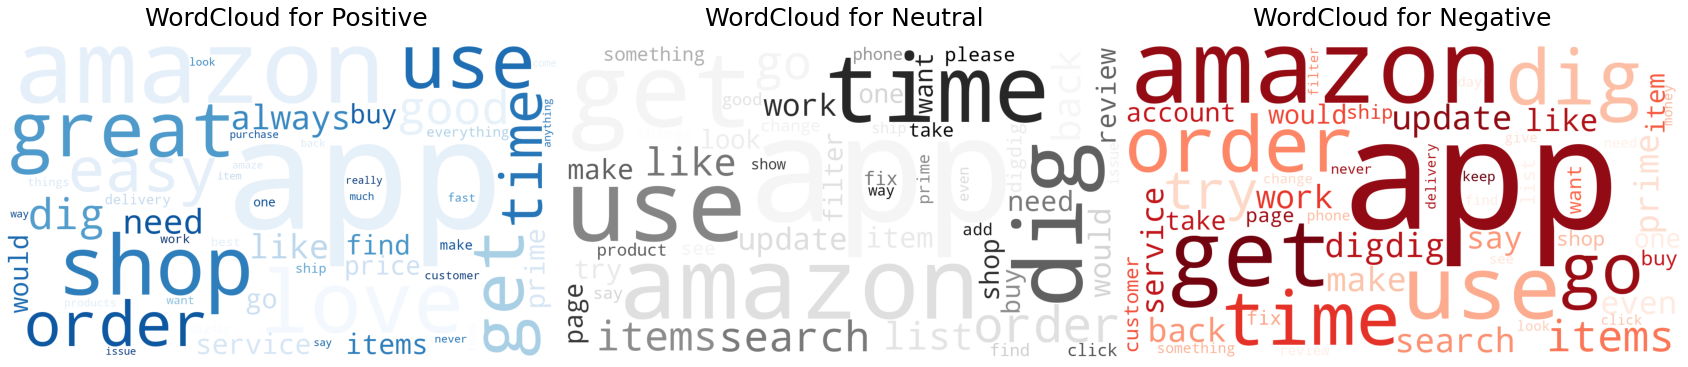

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(30, 30))

axs[0].set_title('WordCloud for Positive', size=25, pad=20)
axs[0].imshow(positive_wc)
axs[0].axis('off')

axs[1].set_title('WordCloud for Neutral', size=25, pad=20)
axs[1].imshow(neutral_wc)
axs[1].axis('off')

axs[2].set_title('WordCloud for Negative', size=25, pad=20)
axs[2].imshow(negative_wc)
axs[2].axis('off');

fig.subplots_adjust(hspace=1,wspace=0.0)


We can see the words like Easy, Love, Good in Positive Words Cloud. Order, Go, Get in Neutral and Update, Try and Search in the Negative Word Clouds. However words alone can have a lot of different meanings. To get more context we will use the N_grams to identify what kind of thing they are talking about in each sentiment.

<a id="NGP"></a>
## 7.3 - N_Gram Plot

 
 That is a very nice way to understand the most comuns topics per sentiment. To do that we will use the module CountVectorizer from sklearn feature_extraction text library. 
 It might seem a little bit of a mess at first look but it's not.
     We builded a function that counted the 1,2,3 and 4 grams per sentiment and another function to define the dfs per sentiment calling the first function.

 Then we will end up with amazon_results df that contain a list of 12 dfs. 
    
   * Mono-gram - positive neutral and negative.
   * Bi-gram - for positive neutral and negative.
   * Tri-gram - for positive neutral and negative.
   * Tetra-gram - for positive neutral and negative.

Then we will use subplot to plot the top 5 most comuns n-grams for each sentiment.

     

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [44]:
def ngram_results(df):
    
    df_1=df[df['sentiment_positive']==1]
    df_2=df[df['sentiment_neutral']==1]
    df_3=df[df['sentiment_negative']==1]
    
    
    def uni_bi_tri(df_pos,df_neu,df_neg):
        
        #pos
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_pos['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_pos=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
       
        #neu
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neu['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neu=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        #neg
        word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_mono_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_bi_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)

        word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tri_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        word_vectorizer = CountVectorizer(ngram_range=(4,4), analyzer='word')
        sparse_matrix = word_vectorizer.fit_transform(df_neg['reviews'][:10000])
        frequencies = sum(sparse_matrix).toarray()[0]
        result_tetra_neg=pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by=['frequency'],ascending=False)
        
        results=[result_mono_pos,result_bi_pos,result_tri_pos,result_tetra_pos,
                 result_mono_neu,result_bi_neu,result_tri_neu,result_tetra_neu,
                 result_mono_neg,result_bi_neg,result_tri_neg,result_tetra_neg]
        
        return results
    

    
    return uni_bi_tri(df_1,df_2,df_3)



In [45]:
amazon_results = ngram_results(df)

In [46]:
def rename_index(dflist):

    #pos
    df_mono_pos=pd.DataFrame(dflist[0]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_pos=pd.DataFrame(dflist[1]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_pos=pd.DataFrame(dflist[2]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_pos=pd.DataFrame(dflist[3]).reset_index().rename(columns={'index':'Tetra_Pos'})
    #neu
    df_mono_neu=pd.DataFrame(dflist[4]).reset_index().rename(columns={'index':'Mono_Neu'})
    df_bi_neu=pd.DataFrame(dflist[5]).reset_index().rename(columns={'index':'Bi_Neu'})
    df_tri_neu=pd.DataFrame(dflist[6]).reset_index().rename(columns={'index':'Tri_Neu'})
    df_tetra_neu=pd.DataFrame(dflist[7]).reset_index().rename(columns={'index':'Tetra_Neu'})
    #neg
    df_mono_neg=pd.DataFrame(dflist[8]).reset_index().rename(columns={'index':'Mono_Pos'})
    df_bi_neg=pd.DataFrame(dflist[9]).reset_index().rename(columns={'index':'Bi_Pos'})
    df_tri_neg=pd.DataFrame(dflist[10]).reset_index().rename(columns={'index':'Tri_Pos'})
    df_tetra_neg=pd.DataFrame(dflist[11]).reset_index().rename(columns={'index':'Tetra_Neg'})
    
    result=[df_mono_pos, df_bi_pos, df_tri_pos, df_tetra_pos,
            df_mono_neu, df_bi_neu, df_tri_neu, df_tetra_neu,
            df_mono_neg, df_bi_neg, df_tri_neg, df_tetra_neg]
    
    return result

In [47]:
amazon_results=rename_index(amazon_results)

In [48]:
#for df in amazon_results:
fig = make_subplots(rows=3, cols=4,
                    vertical_spacing=0.15,
                    column_titles =['Mono-grams','Bi-grams','Tri-grams','Tetra-grams'],
                    row_titles =['Positive','Neutral','Negative'],                  
      
                   )
#for df in amazon_results:
fig.add_trace(go.Bar(
            x = amazon_results[0][amazon_results[0].columns[0]].head(),
            y = amazon_results[0][amazon_results[0].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=1)
fig.add_trace(go.Bar(
            x = amazon_results[1][amazon_results[1].columns[0]].head(),
            y = amazon_results[1][amazon_results[1].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=2)
fig.add_trace(go.Bar(
            x = amazon_results[2][amazon_results[2].columns[0]].head(),
            y = amazon_results[2][amazon_results[2].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=3)
    # neu
fig.add_trace(go.Bar(
            x = amazon_results[3][amazon_results[3].columns[0]].head(),
            y = amazon_results[3][amazon_results[3].columns[1]].head(),
            marker_color='DeepSkyBlue',
            ),row=1, col=4)
fig.add_trace(go.Bar(
            x = amazon_results[4][amazon_results[4].columns[0]].head(),
            y = amazon_results[4][amazon_results[4].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=1)
fig.add_trace(go.Bar(
            x = amazon_results[5][amazon_results[5].columns[0]].head(),
            y = amazon_results[5][amazon_results[5].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=2)
    # neg
fig.add_trace(go.Bar(
            x = amazon_results[6][amazon_results[6].columns[0]].head(),
            y = amazon_results[6][amazon_results[6].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=3)
fig.add_trace(go.Bar(
            x = amazon_results[7][amazon_results[7].columns[0]].head(),
            y = amazon_results[7][amazon_results[7].columns[1]].head(),
            marker_color='Lightgrey',
            ),row=2, col=4)
fig.add_trace(go.Bar(
            x = amazon_results[8][amazon_results[8].columns[0]].head(),
            y = amazon_results[8][amazon_results[8].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=1)
fig.add_trace(go.Bar(
            x = amazon_results[9][amazon_results[9].columns[0]].head(),
            y = amazon_results[9][amazon_results[9].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=2)
fig.add_trace(go.Bar(
            x = amazon_results[10][amazon_results[10].columns[0]].head(),
            y = amazon_results[10][amazon_results[10].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=3)
fig.add_trace(go.Bar(
            x = amazon_results[11][amazon_results[11].columns[0]].head(),
            y = amazon_results[11][amazon_results[11].columns[1]].head(),
            marker_color='Crimson',
            ),row=3, col=4)


    
#
fig.update_layout({"showlegend": False},height=900, width=1000)
fig.show()

For positive reviews we usually see easy use, love shop amazon or great customer service. For neutral reviews some specific topics that maybe people are facing troubles and it should be improved like wish list, kindle book, amazon smile or something to bring back. Negative reviews usually see people talking about the latest updates and we see some error messages like "something went wrong" among more other things. 
 
It makes way more sense isn't it? 
 
When smaller is the n_gram shows more similarity between the sentiments and the opposite happens when we increase the number of grams.


<a id="Modeling"></a>
# 8 - Modeling

Before we build our deep learning model, we are going to go through a few steps. The first one is to Split the data frame into Train and Test. Second, we will vectorize and embed the reviews. 
In order to prevent overfitting we will balance the train set and also reduce the amount of features of it. Then we are going to create 3  functions of metrics that will be used into our model.


<a id="TTS"></a>
## 8.1 - Train Test Split

Now, we will divide our data into training and test sets using sklearn.model_selection module train_test_split.

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
y =  df[df.columns[1:]].values

In [92]:
X = []

sentences = list(df["reviews"])
for sen in sentences:
    X.append(sen)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<a id="E"></a>
## 8.2 - Embedding

We need to convert text inputs into embedded vectors such that we can apply machine learning. In word embeddings, every word is represented as an n-dimensional dense vector. The words that are similar will have similar vectors. [See more about embedding](https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/)
 
 In order to embed our text, first we need to transform our reviews into vector representations. Here we will use Tokenizer module from keras.preprocessing.text to vectorize the text corpus and we will need the module pad_sequences  from keras.preprocessing.sequence to ensure that all sequences in the list of words have the same length. 
 
After vectorising the text and ensuring that all sequences have the same length we will use the GloVe, Global Vectors For Word Representation to convert text inputs to their numeric counterparts. [See more about GloVe](https://nlp.stanford.edu/projects/glove/)



In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [95]:
# Defining the num of words
tokenizer = Tokenizer(num_words=5000)
# Fighting in the X df
tokenizer.fit_on_texts(X)

# Tokenizing Train and test

X_prep = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

# Setting the max length of features

maxlen = 200

# Ensuring the all sequences have the same length
X_train = pad_sequences(X_prep, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

We will be using numpy arrays and GloVe word embeddings to convert text inputs to their numeric counterparts.

In [96]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [97]:
embeddings_dictionary = dict()

glove_file = open('../input/glove6b100d/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

<a id="B"></a>
## 8.3 - Balancing

As seen before, the data set is highly unbalanced, to be more precise in the results we will balance the dataset using the imblearn Random OverSampling technique.

In [98]:
print('Negative',pd.DataFrame(y_train).sum()[0])
print('Neutral',pd.DataFrame(y_train).sum()[1])
print('Positve',pd.DataFrame(y_train).sum()[2])

Negative 6834
Neutral 1601
Positve 5698


In [99]:
from imblearn.over_sampling import RandomOverSampler

In [100]:
over = RandomOverSampler()
    
X_ov, y_ov = over.fit_resample(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning:

Pass classes=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



In [101]:
print('Negative',pd.DataFrame(y_ov).sum()[0])
print('Neutral',pd.DataFrame(y_ov).sum()[1])
print('Positve',pd.DataFrame(y_ov).sum()[2])


Negative 6834
Neutral 6834
Positve 6834


<a id="FS"></a>
## 8.4 - Featuring Selection

In order to prevent overfitting we are going to reduce the features of the data frame. To do that we are going to use one of the simplest and most common ways to select relevant features for classification which is to calculate the F-Score for each feature. 
 
The F-Score is calculated using the variance between the features and the variance within each feature. A small F-score usually means that the feature is less important than a feature with a high F-score. We will calculate the F-Score of the features per sentiment using sklearn modules SelectKBest and f_classif to return the ANOVA F-value.
 
 
I highly recommend see the Nils Schlüter [Medium article](https://towardsdatascience.com/dont-overfit-how-to-prevent-overfitting-in-your-deep-learning-models-63274e552323) for more ways to prevent overfitting in Deep Learning Models.


In [102]:
from sklearn.feature_selection import f_classif, SelectKBest

In [103]:
selected_features = [] 
for label in range(0,3):
    selector = SelectKBest(f_classif, k='all')
    selector.fit(X_ov, pd.DataFrame(y_ov)[label])
    selected_features.append(list(selector.scores_))

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning:

Features [185 186 187 188 189 190 191 192 193 194 195 196 197 198 199] are constant.

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning:

Features [185 186 187 188 189 190 191 192 193 194 195 196 197 198 199] are constant.

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning:

invalid value encountered in true_divide

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning:

Features [185 186 187 188 189 190 191 192 193 194 195 196 197 198 199] are constant.

/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarni

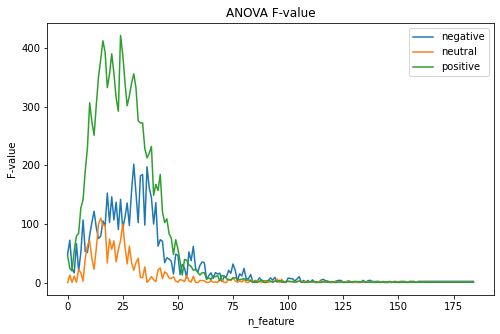

In [104]:
plt.figure(figsize=(8, 5))
plt.plot(selected_features[0])
plt.plot(selected_features[1])
plt.plot(selected_features[2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negative','neutral','positive'], loc='upper right')


plt.show()

 As seeing, usually the reviews have the highest F-Scores till the feature around 10. After that the F_store is visually decreasing. 
So, we will arbitrarily drop the features after the 20.


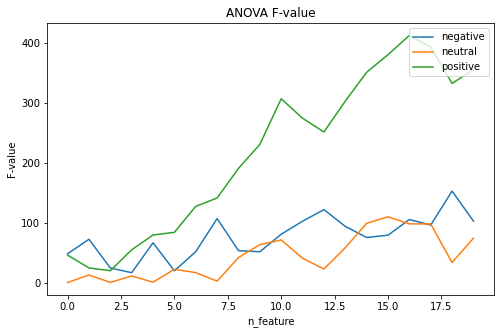

In [105]:
plt.figure(figsize=(8, 5))
plt.plot(pd.DataFrame(selected_features).T[:20][0])
plt.plot(pd.DataFrame(selected_features).T[:20][1])
plt.plot(pd.DataFrame(selected_features).T[:20][2])

plt.title('ANOVA F-value')
plt.ylabel('F-value')
plt.xlabel('n_feature')
plt.legend(['negative','neutral','positive'], loc='upper right')

plt.show()

In [106]:
X_ov=X_ov[:,:20]

<a id="EM"></a>
## 8.5 -  Evaluation Metrics

To go beyond just the Accuracy metric we will calculate also the  Recall, Precision and F1 Score manually.

Reviewing accuracy, recall, precision and f1 score. We are using the [Exsilio Solutions](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=F1%20score%20%2D%20F1%20Score%20is,have%20an%20uneven%20class%20distribution) explanations.

   * TP - True Positive
   * TN - True Negative
   * FP - False Positive
   * FN - False Negative

**Accuracy** -  "Is a great measure but only when you have symmetric datasets where values of false positive and false negatives are almost same" 
 
   * Accuracy = TP+TN/TP+FP+FN+TN


**Precision** - "Precision is the ratio of correctly predicted positive observations to the total predicted positive observations"

   * Precision = TP/TP+FP

**Recall** - "Recall is the ratio of correctly predicted positive observations to the all observations in actual class"
   * Recall = TP/TP+FN

**F1 score** - "F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution."

   * F1 Score  = 2*(Recall * Precision) / (Recall + Precision)
 
Those metrics have been removed from Keras core. [See the release notes](https://github.com/keras-team/keras/wiki/Keras-2.0-release-notes). 
 
So to do that we will use the three following functions that will be called by the Neural Networks.
That functions are made by [Tasos](https://datascience.stackexchange.com/users/201/tasos) answering a question at [Stack Exchange](https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model)



In [107]:
from tensorflow.keras import backend as K

In [108]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


In [109]:

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [110]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

<a id="NN"></a>
## 8.6 -  Neural Networks

To create a model to predict the text sentiment, we will have one input layer shape 20, the number of features. One Embedding Layer that takes the vocab size and the embedding matrix created before. One Long Short-Term Memory (LSTM) layer with 128 neurons and finely the output layer with 3 neurons since we have 3 labels in the output, Positive, Neutral and Negative.

We are going to use keras model module and keras.layers, Dense, LSTM and Embedding.

For the metrics we will set Accuracy, F1, Precision and Recall that we defined above.


In [111]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding

In [112]:
deep_inputs = Input(shape=(20,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc',f1_m,precision_m, recall_m])


Printing the model summary:


In [113]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 20, 100)           1228800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 387       
Total params: 1,346,435
Trainable params: 117,635
Non-trainable params: 1,228,800
_________________________________________________________________
None


To visualize, we will printing the architecture of our neural network with the plot_model from keras utils

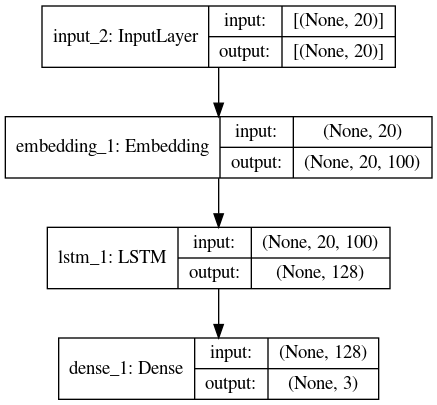

In [114]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

Let's train our model with 0.7 of the random oversampling DF. Batch_size 32 and apochs 10. The other 0.3 of the DF will be used for the validation.

In [115]:
history = model.fit(X_ov, y_ov, batch_size=32, epochs=15, verbose=1, validation_split=0.3)

Epoch 1/15
449/449 [==============================] - 20s 39ms/step - loss: 0.4767 - acc: 0.6634 - f1_m: 0.6458 - precision_m: 0.6932 - recall_m: 0.6083 - val_loss: 0.8771 - val_acc: 0.1554 - val_f1_m: 0.1522 - val_precision_m: 0.1606 - val_recall_m: 0.1448
Epoch 2/15
449/449 [==============================] - 17s 39ms/step - loss: 0.3908 - acc: 0.7441 - f1_m: 0.7350 - precision_m: 0.7807 - recall_m: 0.6963 - val_loss: 0.8993 - val_acc: 0.1473 - val_f1_m: 0.1423 - val_precision_m: 0.1511 - val_recall_m: 0.1345
Epoch 3/15
449/449 [==============================] - 17s 37ms/step - loss: 0.3646 - acc: 0.7619 - f1_m: 0.7550 - precision_m: 0.8049 - recall_m: 0.7129 - val_loss: 0.7911 - val_acc: 0.3157 - val_f1_m: 0.2021 - val_precision_m: 0.2197 - val_recall_m: 0.1897
Epoch 4/15
449/449 [==============================] - 17s 37ms/step - loss: 0.3505 - acc: 0.7728 - f1_m: 0.7656 - precision_m: 0.8138 - recall_m: 0.7243 - val_loss: 0.8367 - val_acc: 0.1918 - val_f1_m: 0.1574 - val_precision_m

<a id="Results"></a>
# 9 - Results

Now let's plot the results that our model got. First let's plot the history of the metrics that the model got during the 10 epochs in the train and in the validation data set. 
Then we are going to build a table to see the metrics 
achieved in the train and in the test data set and finely we will build a function that put our model in context getting a human comment, appling the text preprocessing and the model to plot the label predicted by our model.


<a id="PH"></a>
## 9.1 -  Plotting History

Now, we are going to use matplotlib again to plot the model History that recorded training and validation metrics for each epoch. The results obtained in history for Loss, Accuracy, Precision, Recall and F1 score for Training in blue and Validation in orange.

### Loss

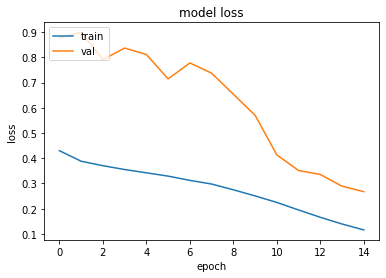

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')

plt.show()

### Accuracy

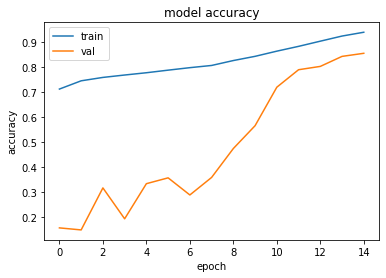

In [117]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


### Precision

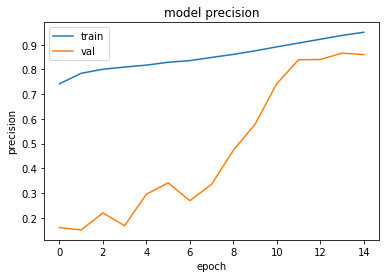

In [118]:
plt.plot(history.history['precision_m'])
plt.plot(history.history['val_precision_m'])

plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


### Recall

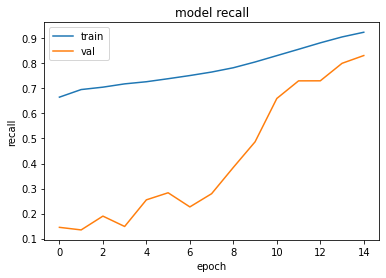

In [119]:
plt.plot(history.history['recall_m'])
plt.plot(history.history['val_recall_m'])

plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


### F1 Score

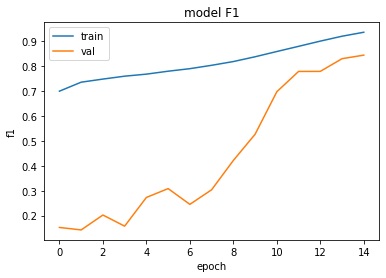

In [120]:
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])

plt.title('model F1')
plt.ylabel('f1')
plt.xlabel('epoch')
plt.legend(['train','val'], loc='upper left')
plt.show()


It seems like a very good model. The training and validation shows good results and are both always close to each other. Also the model keeps improving each epoch.

<a id="TE"></a>
## 9.2 - Test Evaluate

Now let's evaluate in the training and in testing dfs.

In [121]:
score_train = model.evaluate(X_ov[:,:20], y_ov, verbose=1)
score_test = model.evaluate(X_test[:,:20], y_test, verbose=1)

111/111 [==============================] - 2s 14ms/step - loss: 0.6004 - acc: 0.7422 - f1_m: 0.7426 - precision_m: 0.7542 - recall_m: 0.7318


In [122]:
score = pd.DataFrame({'Loss':[score_train[0],score_test[0]],
             'Accuracy':[score_train[1],score_test[1]],
             'Precision':[score_train[3],score_test[3]],
             'Recall':[score_train[4],score_test[4]],
             'F1-Score':[score_train[2],score_test[2]]
                     },
             index=['Train Score','Test Score'])

score

,Loss,Accuracy,Precision,Recall,F1-Score
Train Score,0.150093,0.921666,0.927852,0.908227,0.917561
Test Score,0.600444,0.742218,0.754194,0.731821,0.742558


Low Loss but high in the test, good Accuracy, Precision, Recall and F1-score for both data frames. Excellent! :)

<a id="TF"></a>
## 9.3 - Test Function

For the final test we will build a function that puts everything that we learned into context.
 The following function will apply our pipeline for text preprocessing, classify a comment with our model and will return if the comment  is Positive, Negative or Neutral.

Let's see if the model is really accurate in real world comments. 😏

In [123]:
def sentiment_analysis(text, pipeline, model):
    
    # Applying the pipeline
    if type(text) is not list:
        text = [text]
        text_prep = text_prep_pipeline.fit_transform(text)
        text_prep = tokenizer.texts_to_sequences(text_prep)
        matrix = pad_sequences(text_prep, padding='post', maxlen=20)
        # Predicting sentiment
        proba = model.predict(matrix)
    
    
    # Plotting the sentiment and its score
    fig, ax = plt.subplots(figsize=(5, 3))
    
    if proba.argmax() == 0 :
        text = 'Negative'
        class_proba = int(proba[0][0].round(2)*100)
        color = 'Crimson'
        
    elif proba.argmax() == 1 :
        text = 'Neutral'
        class_proba = int(proba[0][1].round(2)*100) 
        color = 'Lightgrey'
       
    elif proba.argmax() == 2 :
        text = 'Positive'
        class_proba = int(proba[0][2].round(2)*100) 
        color = 'DeepSkyBlue'
        
    ax.text(0.5, 0.5, text, fontsize=50, ha='center', color=color)
    ax.text(0.5, 0.20, str(class_proba) + '%', fontsize=14, ha='center')
    ax.axis('off')
    ax.set_title('Sentiment Analysis', fontsize=14)
    plt.show()
    

In [124]:
#Positive

comment = "The prices are amazing and the shipping is really fast! Thank for everything amazon!"

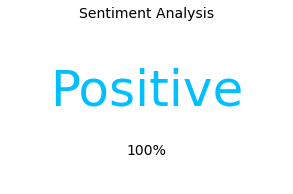

In [125]:
sentiment_analysis(comment, pipeline=text_prep_pipeline,  model=model)

In [126]:
# Negative

comment = "I lost my money. I contact the custom service and they tell to wait receive item but not received yet"

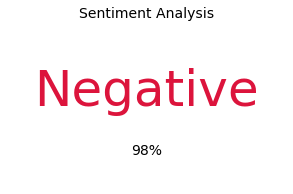

In [127]:
sentiment_analysis(comment, pipeline=text_prep_pipeline, model=model)

In [128]:
# Neutral
comment = "Overall app is ok. But i really want some improvements in the next update."

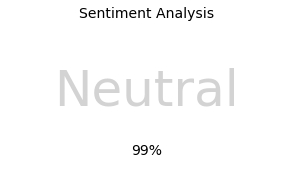

In [129]:
sentiment_analysis(text=comment, pipeline=text_prep_pipeline, model=model)

Yes! :')

<a id="CON"></a>
# 10 - Conclusion 

We just built a very good Keras Deep Learn model for Multi-label Text Classification. Accomplishing the main objective of this project.
 
That was more painful than it seemed, haha. I have tried several times until find a good result with neural networks however fortunately I found  the [Python for NLP: Multi-label Text Classification with Keras](https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/) article that helps me a lot! I really want to thank the [Usman Malik](https://twitter.com/usman_malikk), for writing it. That was essential to accomplish that result in this project. 
 
I'm open to all improvements, rewording or criticism. Please don't hesitate to leave me a comment and If you liked this notebook, please upvote and leave your feedback in the comments!
 
It motivates me a lot to keep doing those types of projects and sharing here.
 
That's it for now.
 
 
Cheers 🍀

[Back To Top](#top)
